In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage.io import imread_collection, imread

In [16]:
depth = 64
n = 32 #image dim
batch_size = 250
epochs = 20
categories = 10

In [23]:
# Load the data
dir_train =         "H:/Documents/Molly's stuff/PatternFlow/recognition/Task1_Improved_UNet/Data/ISIC2018_Task1-2_Training_Input_x2/*.jpg"
dir_test =          "H:/Documents/Molly's stuff/PatternFlow/recognition/Task1_Improved_UNet/Data/ISIC2018_Task1_Training_GroundTruth_x2/*.png"

train = imread_collection(dir_train)
test = imread_collection(dir_test)

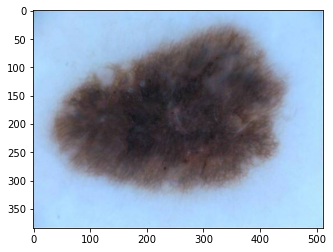

In [24]:
# Check images loaded correctly
plt.imshow(train[0], cmap='gray')
plt.show()

In [26]:
train[0].shape

(384, 511, 3)

In [19]:
# Convert image collections to tensors and normalise
train = tf.convert_to_tensor(train)
test = tf.convert_to_tensor(test)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [ ]:
train, validate = train_test_split(train, test_size=0.2, random_state=1234)

In [ ]:
train = tf.cast(train, tf.float32) / 255.
validate = tf.cast(validate, tf.float32) / 255.
test = tf.cast(test, tf.float32) / 255.

print(train.shape)
print(validate.shape)
print(test.shape)

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13190135942505760364
]


In [11]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# split train set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
#categorical one hot encoder
y_train_cat = to_categorical(y_train, categories)
y_val_cat = to_categorical(y_val, categories)
y_test_cat = to_categorical(y_test, categories)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train_cat.shape)
print(y_val_cat.shape)
print(y_test_cat.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 10)
(10000, 10)


In [6]:
# create the network
inputs = Input(shape=(n,n,3))
net1 = Conv2D(depth, (3,3), padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2,2))(net1)
# dropout1 = Dropout(rate=.1)(pool1)
net2 = Conv2D(depth*4, (3,3), padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2), strides=(1,1))(net2)
dropout2 = Dropout(rate=.2)(pool2)
net3 = Conv2D(depth*8, (3,3), padding='same', activation='relu')(dropout2)
pool3 = MaxPooling2D(pool_size=(2,2))(net3)
# dropout3 = Dropout(rate=.3)(pool3)
net4 = Conv2D(depth*16, (3,3), padding='same', activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2,2), strides=(1,1))(net4)
dropout4 = Dropout(rate=.4)(pool4)
flat = Flatten()(dropout4)
net5 = Dense(depth*32, activation='relu')(flat)
output = Dense(categories, activation='softmax')(net5)

In [7]:
# Map an input to its reconstruction to create model
model = Model(inputs, output)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_hist = model.fit(X_train, y_train_cat,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(X_val, y_val_cat))

In [ ]:
# Predict the labels of the test set using the trained model
predictions = model.predict(X_test)

In [ ]:
# Evaluate the performance
predictions = np.argmax(predictions, axis=1)
print(predictions)

In [ ]:
print(classification_report(y_test, predictions))
print(model_hist.history.keys())

In [ ]:
#Accuracy
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#Loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()